In [45]:
import pandas as pd
import numpy as np
from datetime import datetime

In [46]:
permits = pd.read_csv("building_permits.csv")
permits

/var/folders/t8/c3gz51w107s3mw7rbv_100lr0000gn/T/ipykernel_14601/2473949095.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv("building_permits.csv")


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [3]:
permits.shape

(198900, 43)

In [4]:
permits.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [5]:
permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [7]:
permits.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [8]:
permits.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [12]:
permits['Permit Type'].unique()

array([4, 3, 8, 6, 7, 1, 5, 2])

In [13]:
permits['Permit Type'].nunique()

8

In [14]:
DUPLICATES = permits.duplicated()
DUPLICATES

0         False
1         False
2         False
3         False
4         False
          ...  
198895    False
198896    False
198897    False
198898    False
198899    False
Length: 198900, dtype: bool

In [15]:
print(DUPLICATES.any())

False


In [17]:
permits[DUPLICATES]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


# Completeness

In [18]:
permits.isnull()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False
198896,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,True,True,True,False
198897,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False
198898,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False


In [19]:
permits.count()

Permit Number                             198900
Permit Type                               198900
Permit Type Definition                    198900
Permit Creation Date                      198900
Block                                     198900
Lot                                       198900
Street Number                             198900
Street Number Suffix                        2216
Street Name                               198900
Street Suffix                             196132
Unit                                       29479
Unit Suffix                                 1961
Description                               198610
Current Status                            198900
Current Status Date                       198900
Filed Date                                198900
Issued Date                               183960
Completed Date                             97191
First Construction Document Date          183954
Structural Notification                     6922
Number of Existing S

In [20]:
NOT_NULL = permits.count().sum()
permits.count().sum()

np.int64(6306759)

In [21]:
permits.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [22]:
NULL = permits.isnull().sum().sum()
permits.isnull().sum().sum()

np.int64(2245941)

In [23]:
#total number of cells
TOT = permits.shape[0]*permits.shape[1]
TOT

8552700

In [24]:
TOT = NOT_NULL + NULL
TOT

np.int64(8552700)

# COMPLETENESS EVALUATION:

In [26]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

73.7%


In [27]:
print(permits.describe())

         Permit Type  Street Number          Unit  Number of Existing Stories  \
count  198900.000000  198900.000000  29479.000000               156116.000000   
mean        7.522323    1121.728944     78.517182                    5.705773   
std         1.457451    1135.768948    326.981324                    8.613455   
min         1.000000       0.000000      0.000000                    0.000000   
25%         8.000000     235.000000      0.000000                    2.000000   
50%         8.000000     710.000000      0.000000                    3.000000   
75%         8.000000    1700.000000      1.000000                    4.000000   
max         8.000000    8400.000000   6004.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.584903e+06   
mi

In [28]:
print(permits['Permit Creation Date'].min(), permits['Permit Creation Date'].max())

01/02/2013 12/31/2015


In [32]:
%pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 654.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.8/170.8 kB 875.2 kB/s eta 0:00:00a 0:00:01
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 442.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 358.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 381.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 514.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 1.5 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 4.1 MB/s eta 0:00:00a 0:00:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/28.8 MB 110.8 kB/s eta 0:

In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(permits, title="Data Profile")
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'

<Axes: xlabel='Estimated Cost', ylabel='Proposed Units'>

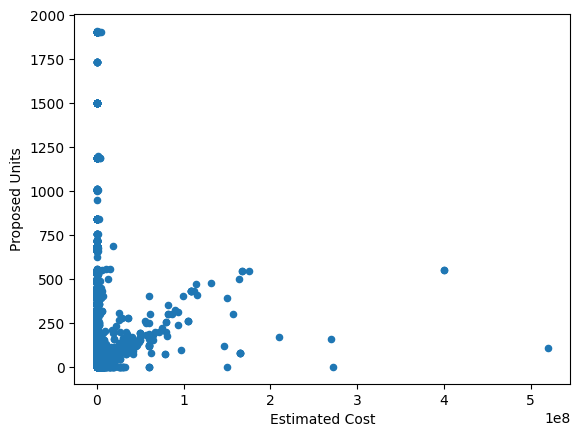

In [30]:
permits.plot.scatter(x='Estimated Cost', y='Proposed Units')

In [36]:
permits['Permit Creation Date'] = pd.to_datetime(permits['Permit Creation Date'])
permits['Year'] = permits['Permit Creation Date'].dt.year
print(permits['Year'].value_counts())

Year
2017    41156
2015    40150
2016    39721
2014    36686
2013    35228
2018     5937
2012       22
Name: count, dtype: int64


In [40]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
%pip install jupyter-contrib-nbextensions

zsh:1: no matches found: ydata-profiling[notebook]

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: contrib dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert nbextensions_configurator notebook run
server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [43]:
from ydata_profiling import ProfileReport
import pandas as pd
import json

ModuleNotFoundError: No module named 'ydata_profiling'

In [44]:
#create a profile report
PROFILE = ProfileReport(permits, title="Profiling Report")
PROFILE

NameError: name 'ProfileReport' is not defined